In [2]:
#load an Example Dataset
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
digits.target #show real array

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
#Shape of the data array
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
#LEARNING AND PREDICTING
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [14]:
#produce new array contain all but last item from digits.data
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
#predict using last image digits.data to 
#determine the image from training set the best matches the last image
clf.predict(digits.data[-1:])

array([8])

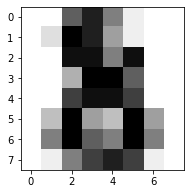

In [18]:
import matplotlib.pyplot as plt
#Display the first digit
plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, 
           interpolation='nearest')
plt.show()

In [19]:
#MODEl PERSISTENCE
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y = True)
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#save a model in scikit-learn by using Python’s 
#built-in persistence model, pickle
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [21]:
y[0]

0

In [22]:
from joblib import dump, load
dump(clf, 'filename.joblib')

['filename.joblib']

In [25]:
clf = load('filename.joblib')
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
#CONVENTIONS
#type casting
#input cast to float64
import numpy as np
from sklearn import random_projection
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [30]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X) #cast to float64
X_new.dtype

dtype('float64')

In [31]:
#regression target cast to float64
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [33]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [35]:
#REFITTING AND UPDATING PARAMETERS
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y = True)

In [36]:
clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [38]:
clf.set_params(kernel='rbf').fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [41]:
#MULTICLASS vs MULTILABEL FITTING
#the classifier is fit on a 1d array of multiclass labels and the predict() method therefore provides 
#corresponding multiclass predictions
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

In [42]:
X = [[1,2],[2,4],[4,5],[3,2],[3,1]]
y = [0,0,1,1,2]

In [43]:
classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X,y).predict(X)

array([0, 0, 1, 1, 2])

In [46]:
"""it() on a 2d binary label representation of y, 
using the LabelBinarizer. In this case predict() returns a 2d array 
representing the corresponding multilabel predictions
"""
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [47]:
""" The MultiLabelBinarizer is used to binarize 
the 2d array of multilabels to fit upon. 
As a result, predict() returns a 2d array with multiple predicted 
labels for each instance.
"""
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0,1],[0,2],[1,3],[0,2,3],[2,4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])